# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [2]:
student_number = "99105623"
full_name = "Parsa Enayati"
assert student_number and full_name is not None, 'pls input your information'

# Introduction

In this assignment, you will implement PCA and try to interpret it.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [4]:
df = pd.read_csv('nutrition.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [6]:
numerical_df = df.select_dtypes([int, float])
numerical_df.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

<Axes: >

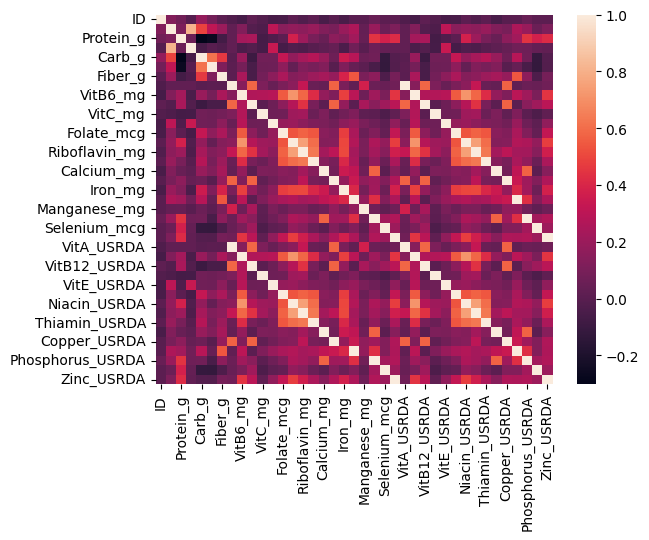

In [7]:
cm = numerical_df.corr()
sns.heatmap(cm)

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

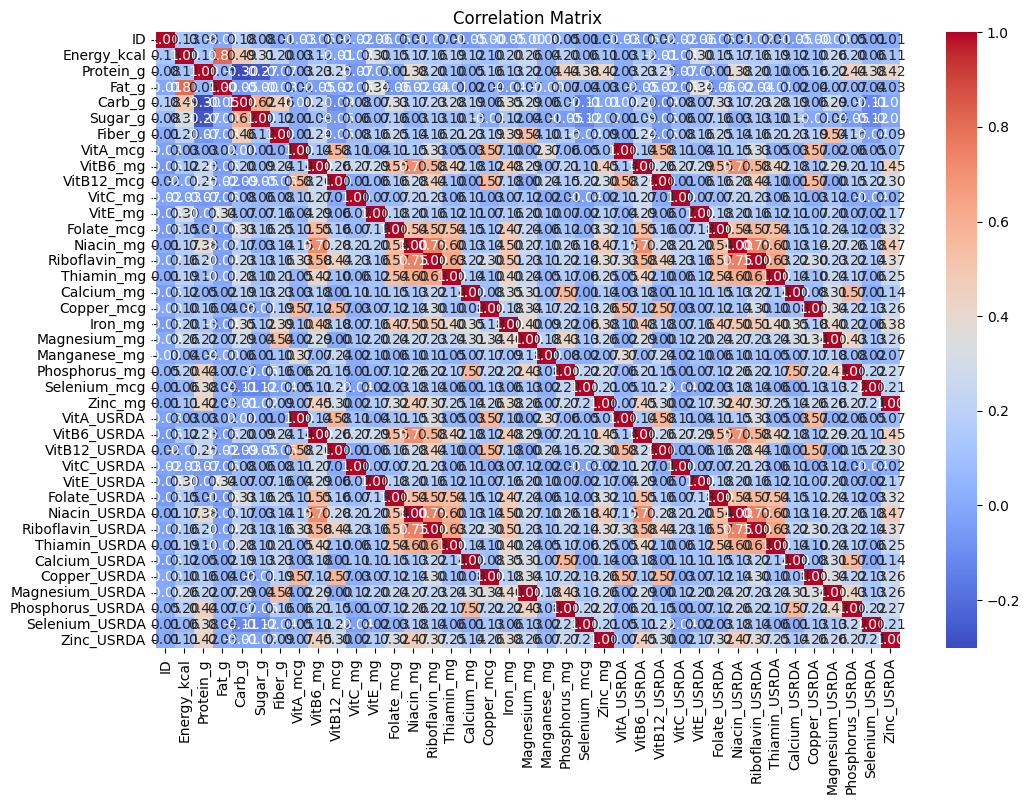

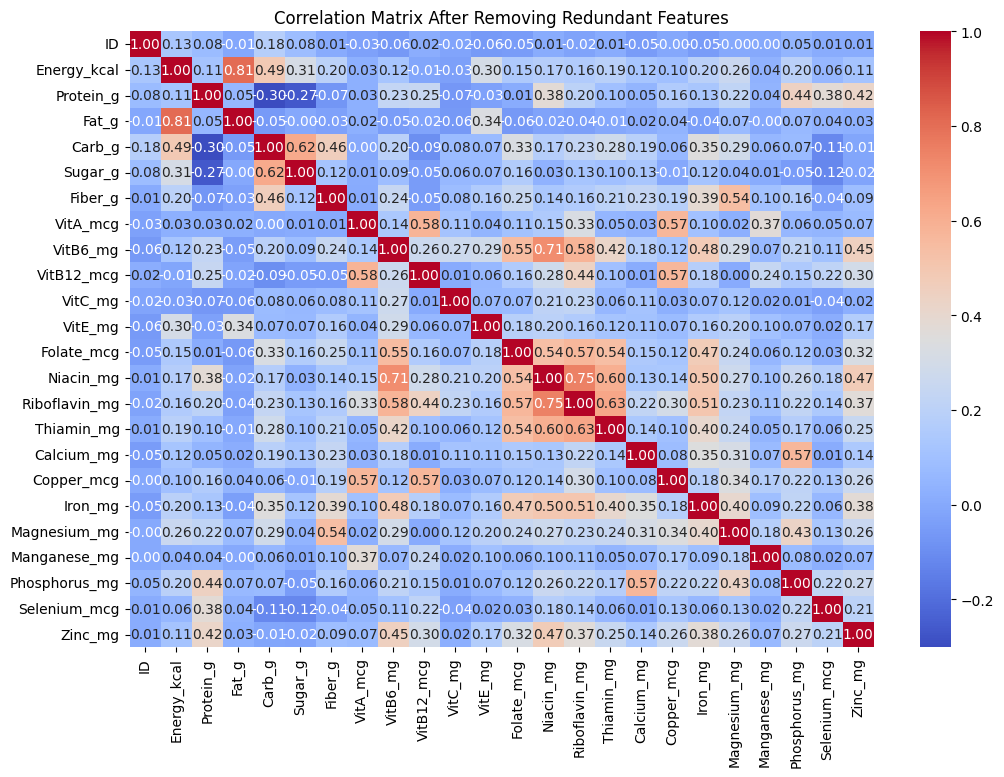

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

redundant_columns = []
threshold = 0.99
for i in range(len(numerical_df.columns)):
    for j in range(i + 1, len(numerical_df.columns)):
        if cm.iloc[i, j] > threshold:
            redundant_columns.append(numerical_df.columns[j])

non_redundant_df = numerical_df.drop(columns=set(redundant_columns), axis=1)

plt.figure(figsize=(12, 8))
new_cm = non_redundant_df.corr()
sns.heatmap(new_cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Removing Redundant Features')
plt.show()

non_redundant_df.head()


<Axes: >

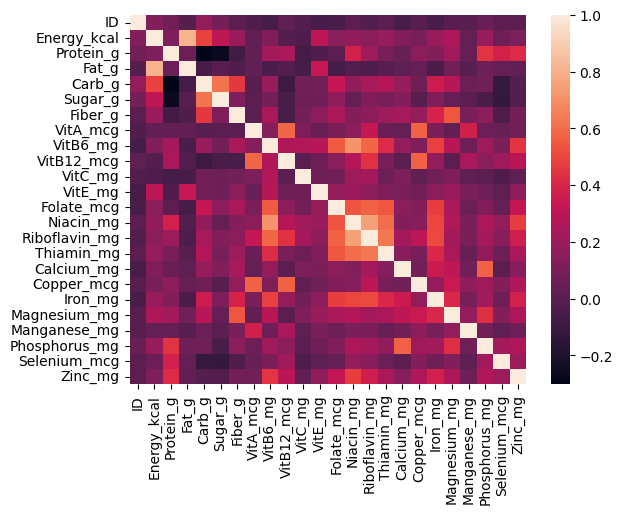

In [9]:
cm = non_redundant_df.corr()
sns.heatmap(cm)

Explore the dataset by plotting the distribution of each feature separately.

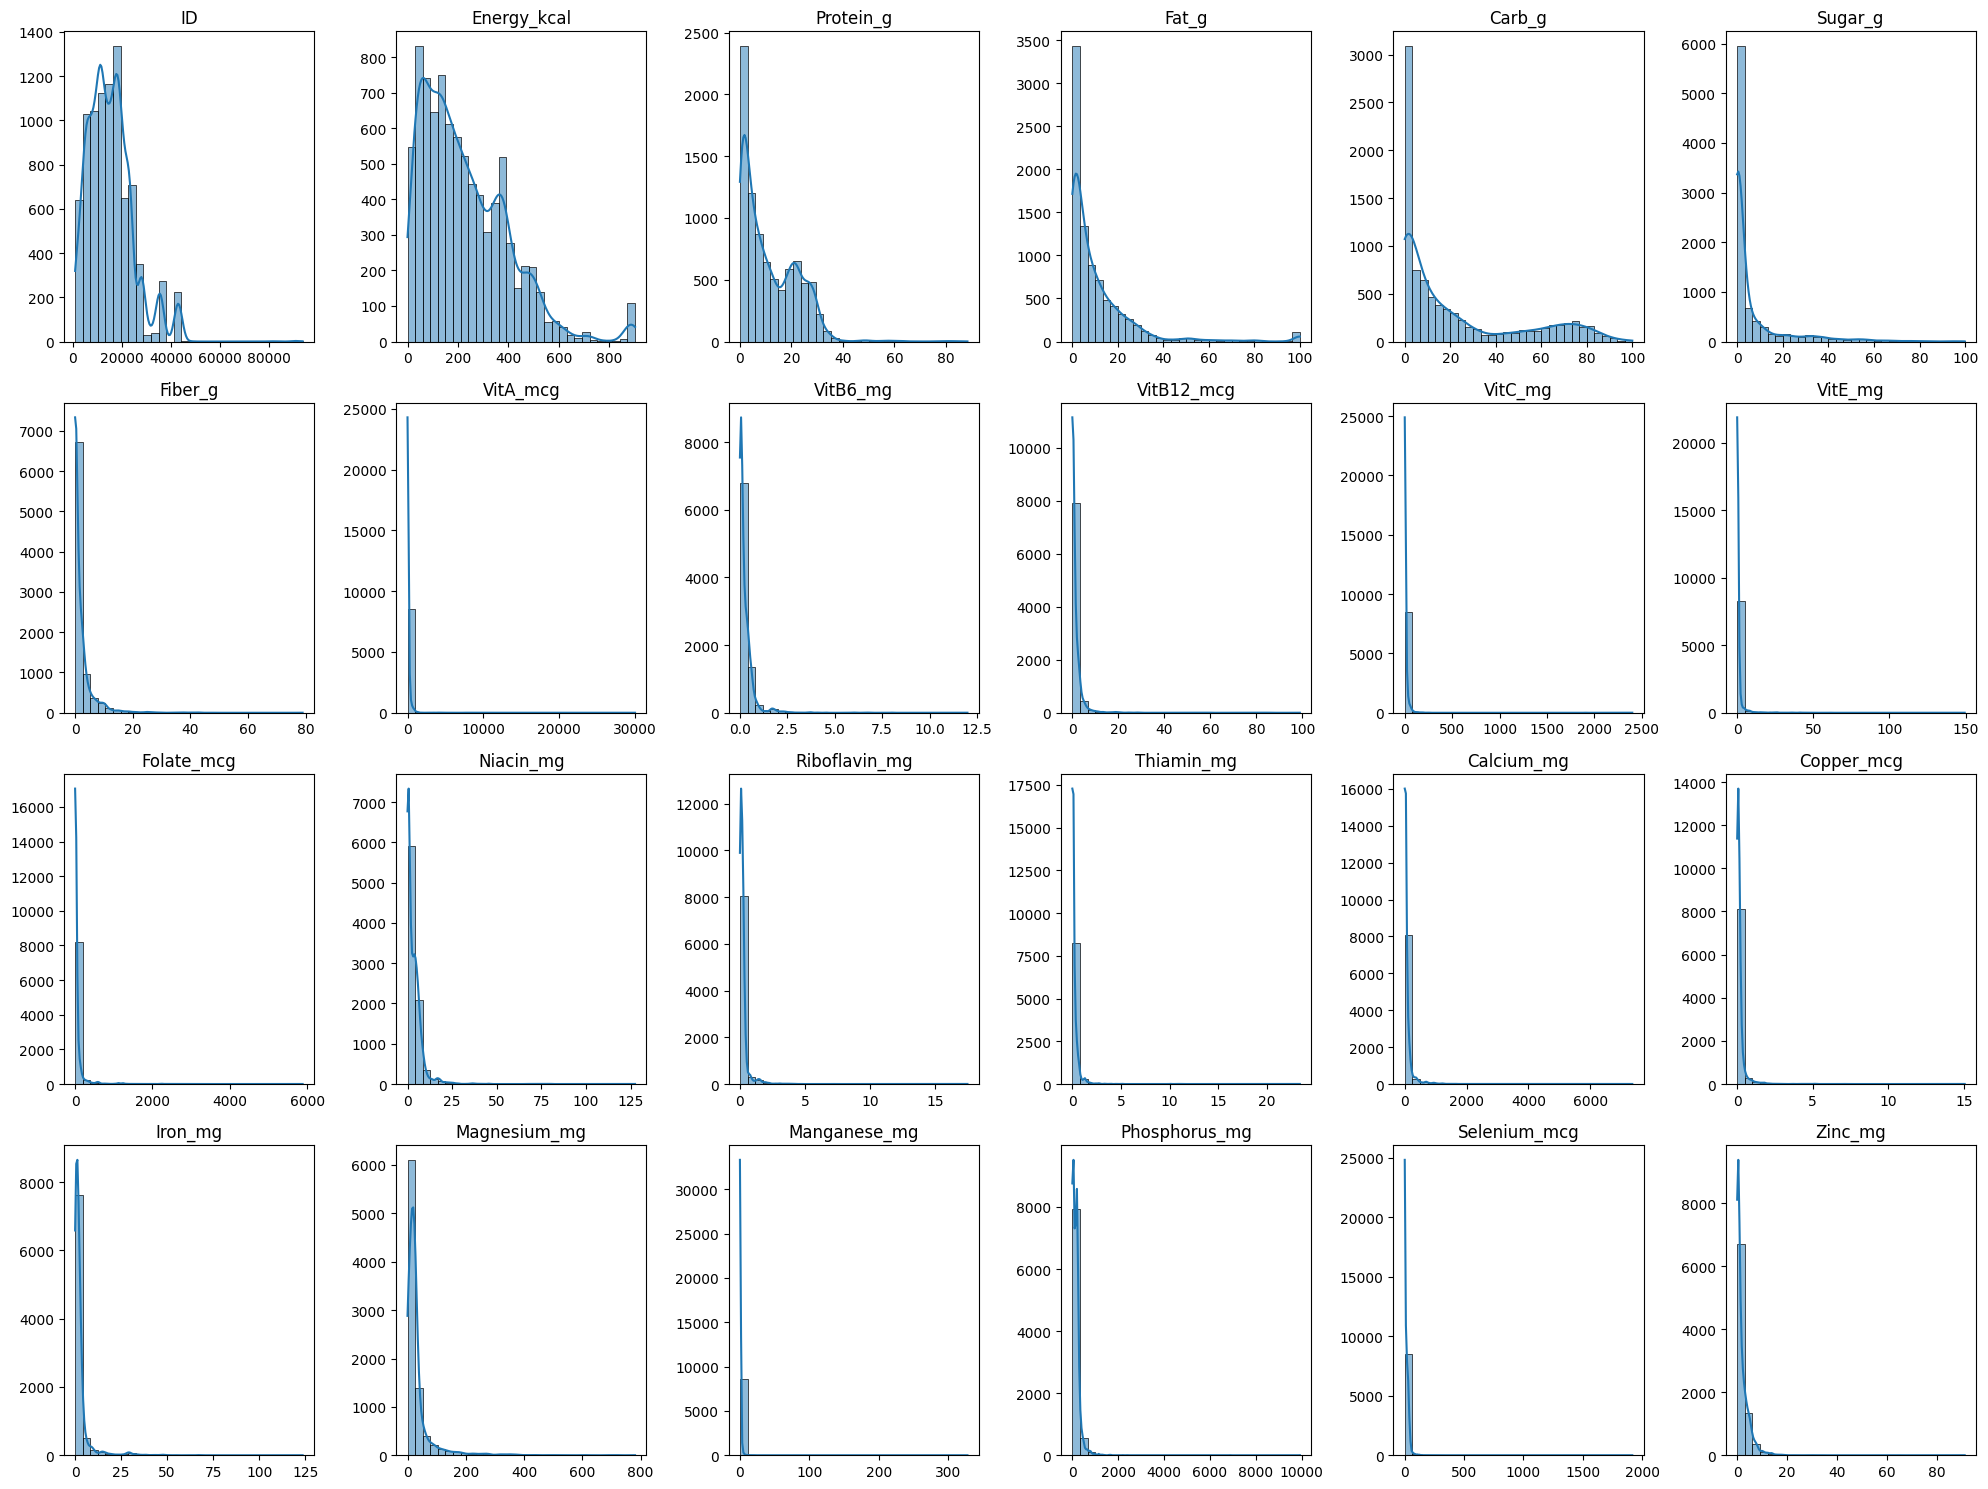

In [10]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(non_redundant_df.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(non_redundant_df[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [ ]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df = df + 1
df_boxcoxed = pd.DataFrame(index=df.index)

for i in df.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

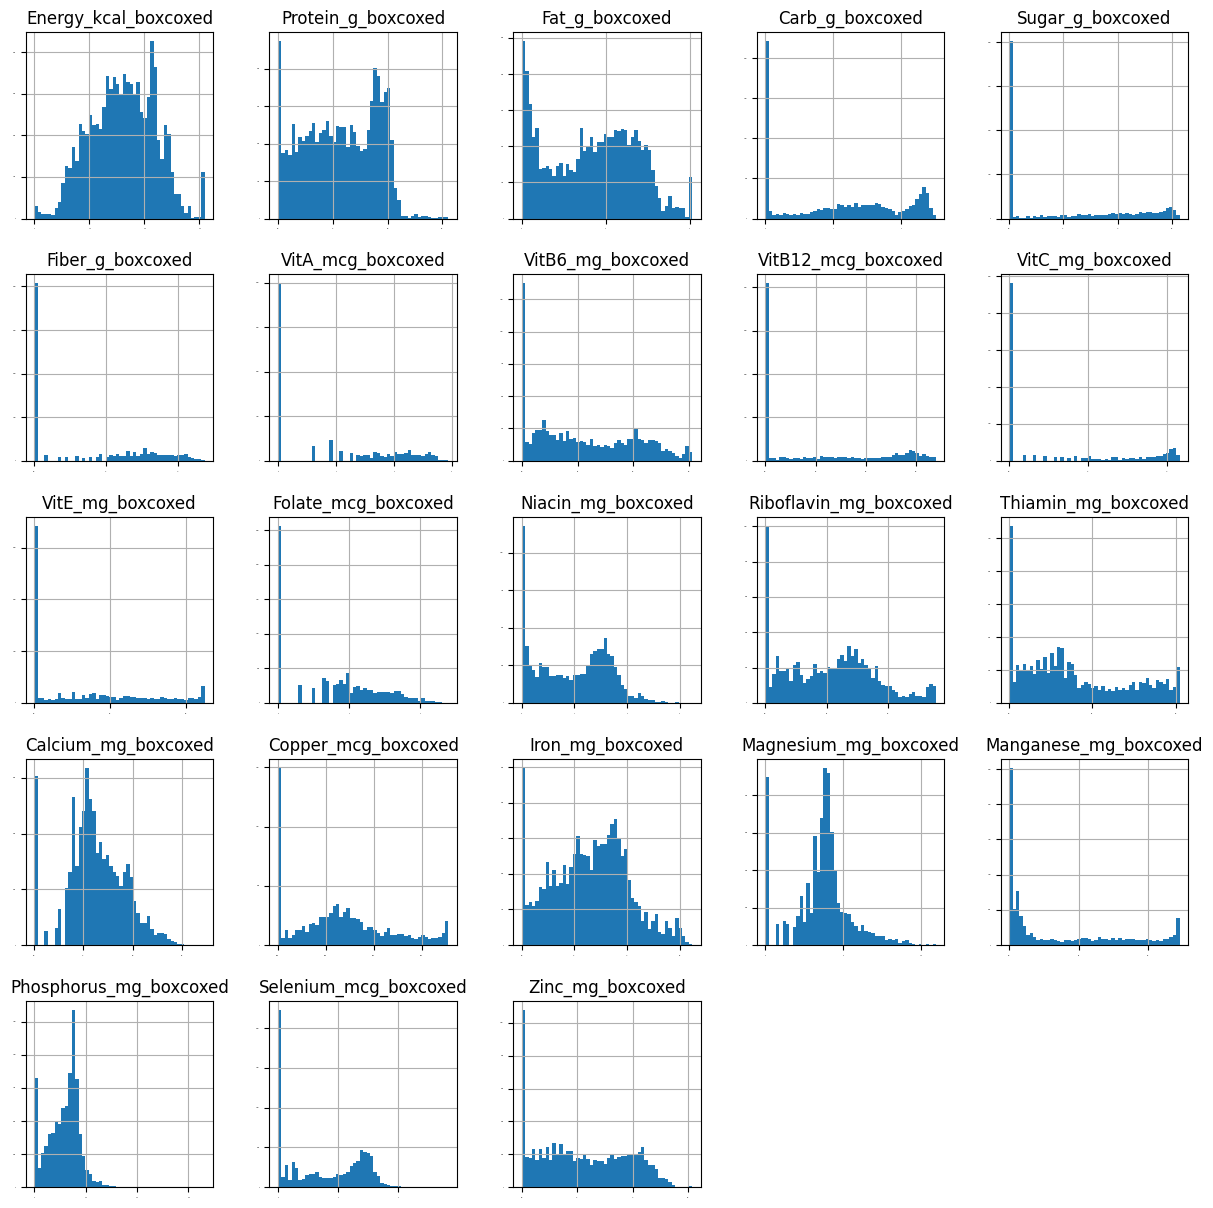

In [ ]:
#TODO

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(non_redundant_df)
standardized_df = pd.DataFrame(standardized_data, columns=non_redundant_df.columns)
mean = standardized_df.mean().mean()
std_dev = standardized_df.std().mean()

print(f'Mean of standardized data: {mean:.2f}')
print(f'Standard deviation of standardized data: {std_dev:.2f}')

standardized_df.head()


Mean of standardized data: 0.00
Standard deviation of standardized data: 1.00


,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,-1.568911,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.244334,...,-0.451809,-0.395218,-0.245398,-0.311347,-0.467425,-0.548385,-0.079028,-0.649918,-0.410557,-0.559918
1,-1.568802,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.253595,...,-0.451809,-0.395218,-0.245398,-0.282415,-0.442978,-0.548385,-0.078401,-0.654842,-0.410557,-0.571830
2,-1.568694,3.834956,-1.065776,5.599153,-0.801069,-0.482325,-0.469058,0.957289,-0.550307,-0.281380,...,-0.516275,-0.402935,-0.344726,-0.309539,-0.470917,-0.584057,-0.079028,-0.753325,-0.445904,-0.583742
3,-1.568585,0.747208,0.936124,1.140402,-0.715158,-0.445564,-0.469058,0.133490,-0.205541,-0.001218,...,0.321775,-0.348916,2.257682,-0.239017,-0.416784,-0.173821,-0.077618,1.137542,0.066632,0.205414
4,-1.568477,0.853478,1.110532,1.199651,-0.698637,-0.444829,-0.469058,0.254109,-0.416579,0.008044,...,0.252864,-0.377855,2.982780,-0.267949,-0.395829,-0.155984,-0.077148,1.452687,0.066632,0.187546


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [12]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)

        X_centered = X - self.mean

        covariance_matrix = np.cov(X_centered.T)

        evals, evecs = np.linalg.eigh(covariance_matrix)

        sorted_indices = np.argsort(evals)[::-1]
        evals = evals[sorted_indices]
        evecs = evecs[:, sorted_indices]

        self.explained_variance_ratio_ = evals[:self.n_components] / np.sum(evals)
        self.components = evecs[:, :self.n_components]
        return self

    def transform(self, X):
        if self.components is None or self.mean is None:
            raise RuntimeError("You must fit the model before transforming the data!")

        X_centered = X - self.mean

        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components

Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [14]:
pca = CustomPCA(standardized_data.shape[1])
pca = pca.fit(standardized_data)

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


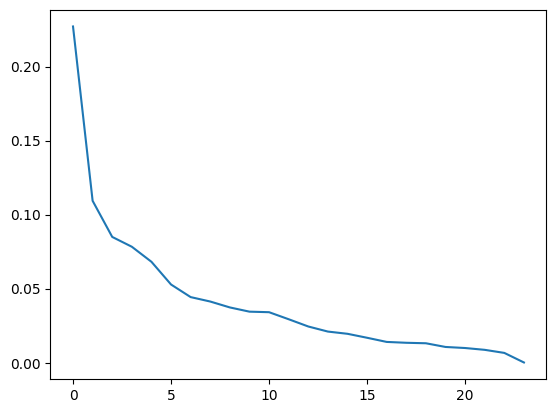

In [15]:
plt.plot(pca.get_explained_variance_ratio())
plt.show()

therefore we are going to pick 5 components

In [19]:
sum(pca.get_explained_variance_ratio()[:5])

0.5677871307958614

Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [21]:
newpca = CustomPCA(5)
newdf = pd.DataFrame(newpca.fit(standardized_data).transform(standardized_data), columns=[f'component{i+1}' for i in range(5)])
newdf.corr().round(2)

,component1,component2,component3,component4,component5
component1,1.0,-0.0,-0.0,0.0,0.0
component2,-0.0,1.0,-0.0,-0.0,0.0
component3,-0.0,-0.0,1.0,-0.0,0.0
component4,0.0,-0.0,-0.0,1.0,0.0
component5,0.0,0.0,0.0,0.0,1.0


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [22]:
feature = 'FoodGroup'
newdf = pd.concat([newdf, df[feature]], axis=1)
newdf

,component1,component2,component3,component4,component5,FoodGroup
0,-1.125071,1.107756,3.490540,-0.998103,3.075699,Dairy and Egg Products
1,-1.117982,1.109631,3.490872,-1.007875,3.068960,Dairy and Egg Products
2,-0.998147,1.505880,4.517329,-1.221430,3.903331,Dairy and Egg Products
3,0.232486,-0.646836,1.761219,0.888398,-0.443694,Dairy and Egg Products
4,0.297375,-0.615893,2.160134,0.962541,-0.881322,Dairy and Egg Products
...,...,...,...,...,...,...
8613,0.574453,-1.529278,2.287489,-0.063639,0.608001,Finfish and Shellfish Products
8614,-0.744474,-0.839443,0.939181,0.625457,-0.867598,Finfish and Shellfish Products
8615,-0.749539,3.750968,-0.298857,-2.117832,0.197259,Sweets
8616,0.373479,-0.203338,1.646354,0.513878,-1.793395,Finfish and Shellfish Products


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [23]:
features = pca.get_components()

<ipython-input-24-61491fa8bdaa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution', y='Feature', data=component_df, palette='viridis')


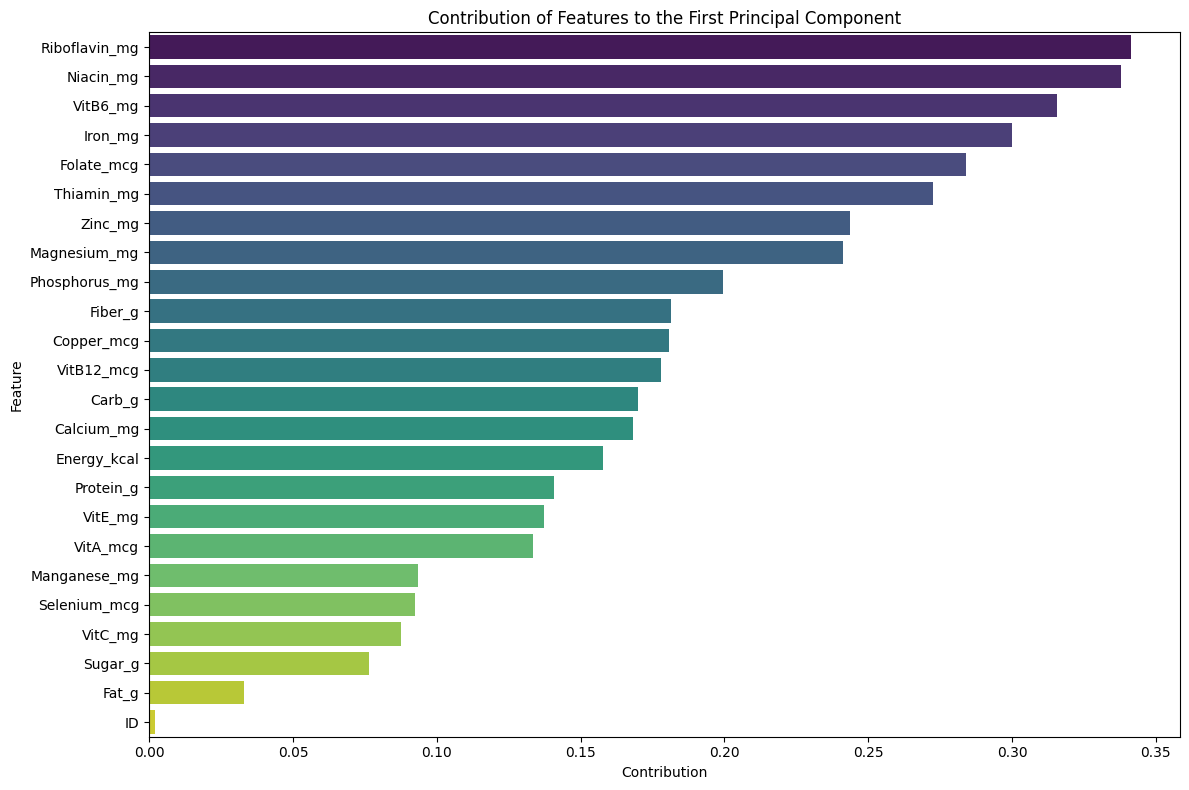

In [24]:
components = pca.get_components()

component_df = pd.DataFrame({
    'Feature': non_redundant_df.columns,
    'Contribution': components[:, 0]
})

component_df = component_df.sort_values(by='Contribution', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Contribution', y='Feature', data=component_df, palette='viridis')
plt.xlabel('Contribution')
plt.ylabel('Feature')
plt.title('Contribution of Features to the First Principal Component')
plt.tight_layout()
plt.show()


<ipython-input-25-6cc5a17bc62b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution', y='Feature', data=component_df, palette='magma')


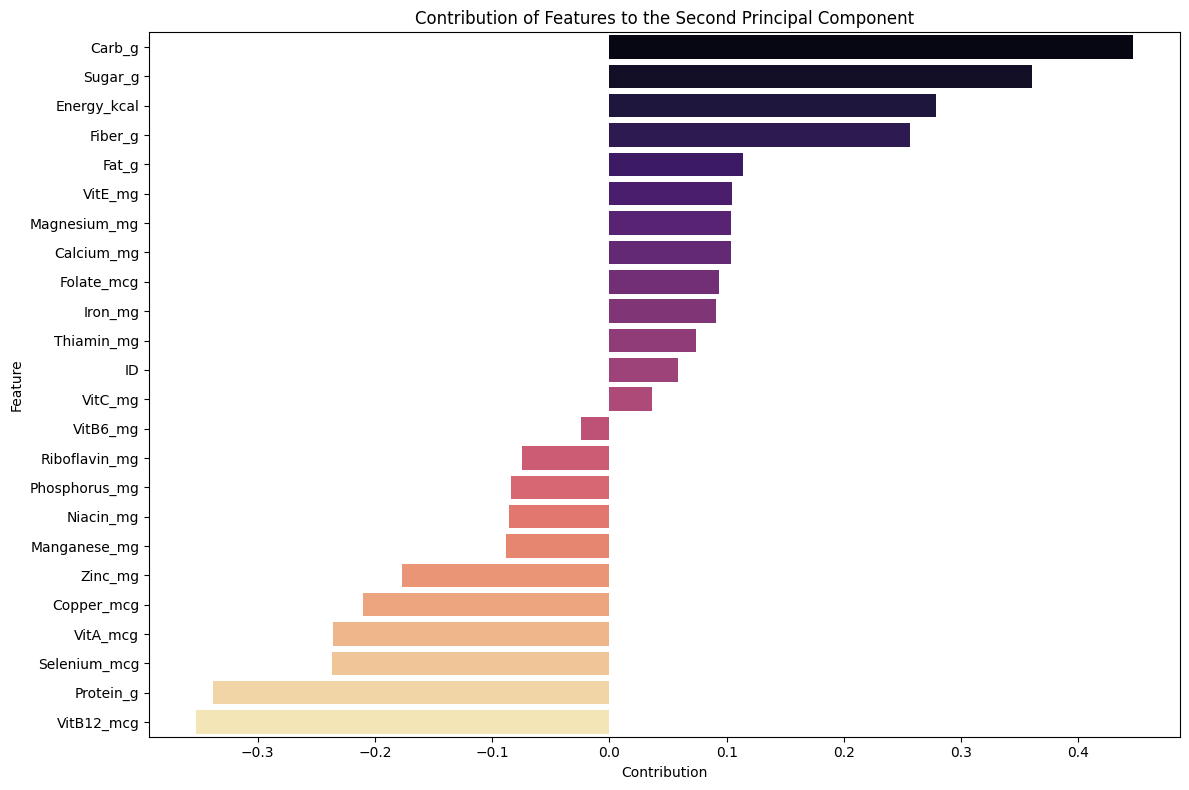

In [25]:
component_df = pd.DataFrame({
    'Feature': non_redundant_df.columns,
    'Contribution': components[:, 1]
})

component_df = component_df.sort_values(by='Contribution', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Contribution', y='Feature', data=component_df, palette='magma')
plt.xlabel('Contribution')
plt.ylabel('Feature')
plt.title('Contribution of Features to the Second Principal Component')
plt.tight_layout()
plt.show()


### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">The weights of each feature in each eigenvector or component</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

<ipython-input-27-984879196e1e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='FoodGroup', data=pca1_samples, order=pca1_samples['FoodGroup'].value_counts().index, palette='viridis')


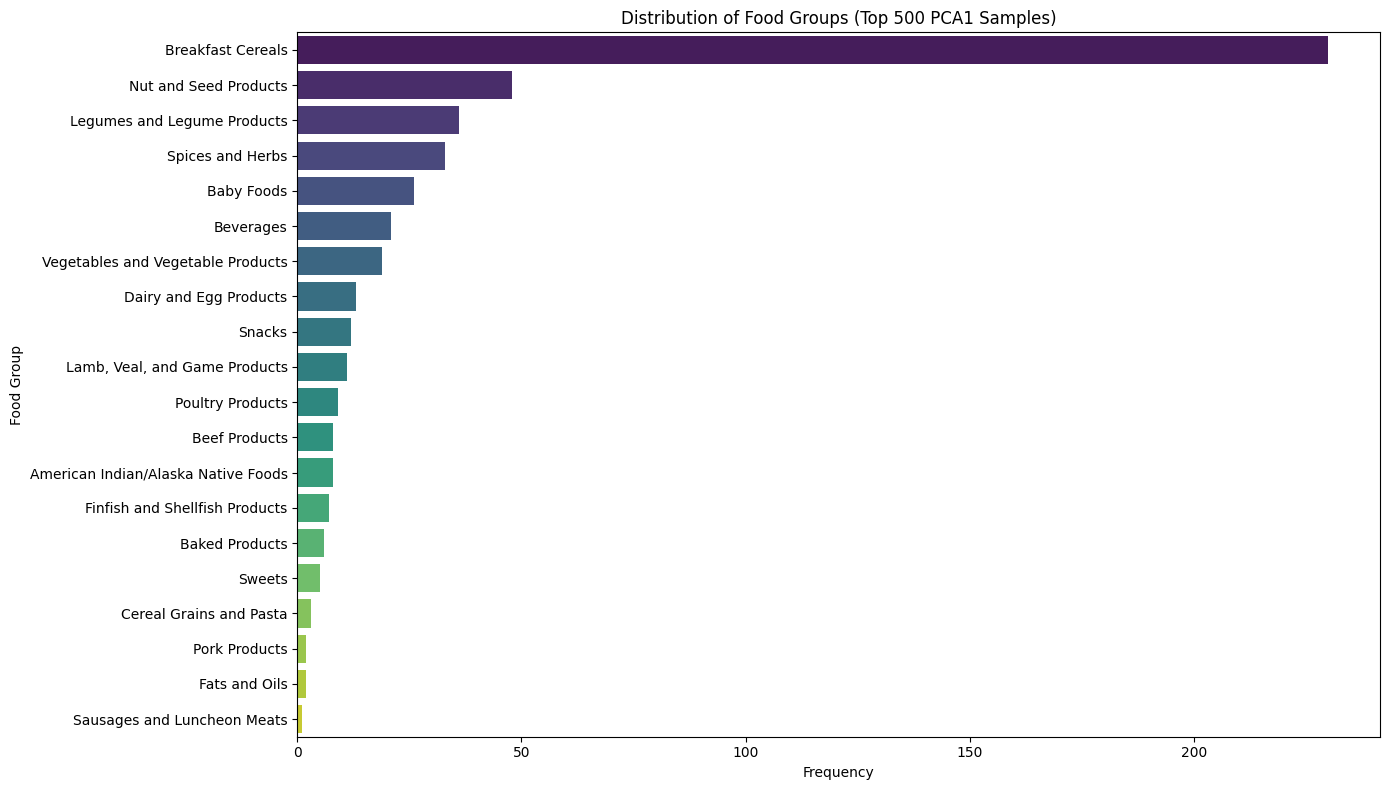

<ipython-input-27-984879196e1e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='component1', y='FoodGroup', data=newdf, palette='viridis')


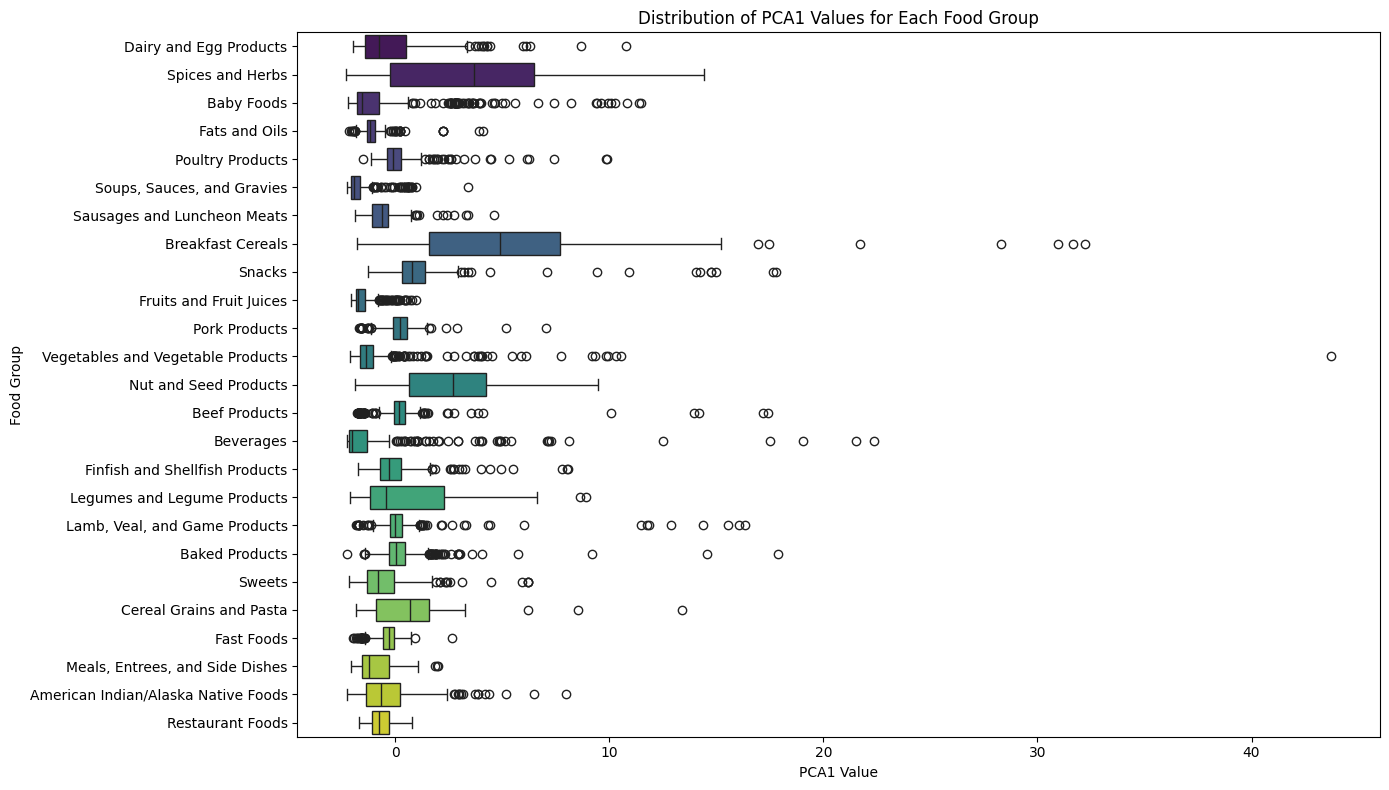

In [27]:
pca1_samples = newdf.nlargest(500, 'component1')

plt.figure(figsize=(14, 8))
sns.countplot(y='FoodGroup', data=pca1_samples, order=pca1_samples['FoodGroup'].value_counts().index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Food Group')
plt.title('Distribution of Food Groups (Top 500 PCA1 Samples)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='component1', y='FoodGroup', data=newdf, palette='viridis')
plt.xlabel('PCA1 Value')
plt.ylabel('Food Group')
plt.title('Distribution of PCA1 Values for Each Food Group')
plt.tight_layout()
plt.show()


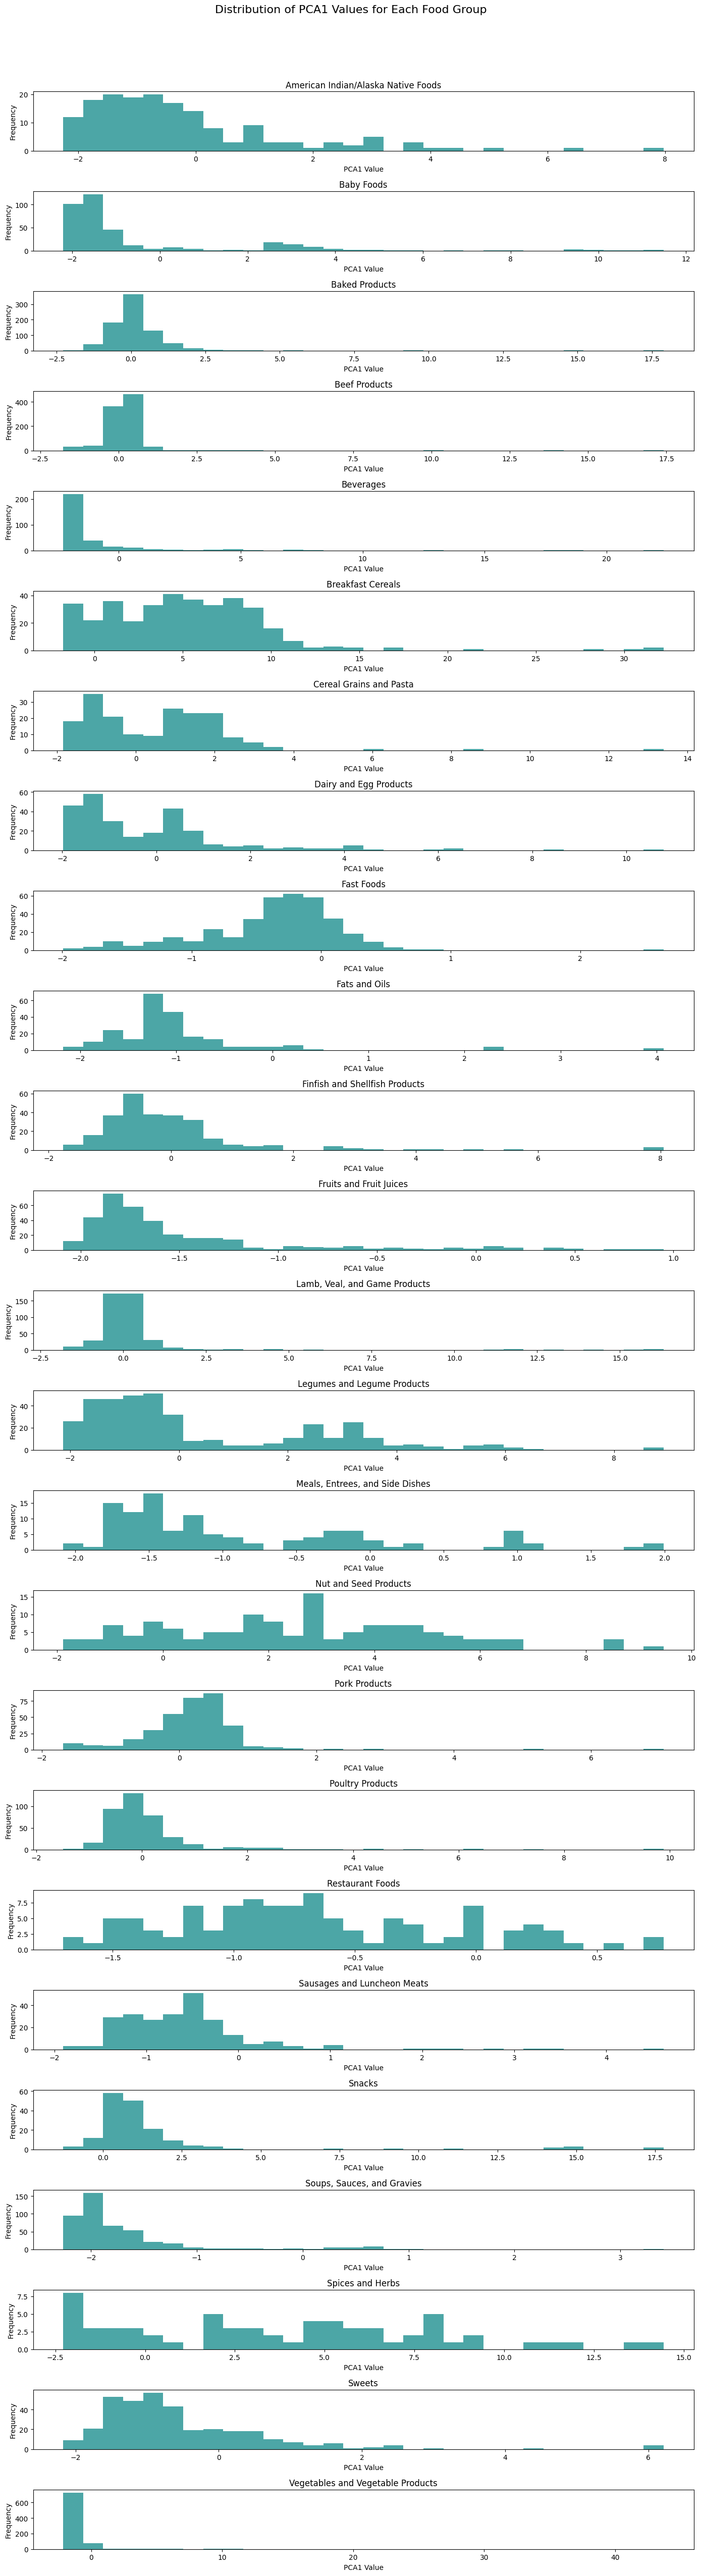

In [32]:
food_groups = np.unique(newdf['FoodGroup'])

fig = plt.figure(figsize=(14, 2 * len(food_groups)))

for i, group in enumerate(food_groups):
    ax = plt.subplot(len(food_groups), 1, i + 1)
    plt.hist(newdf[newdf['FoodGroup'] == group]['component1'], bins=30, alpha=0.7, color='teal')
    ax.set_title(group)
    ax.set_xlabel('PCA1 Value')
    ax.set_ylabel('Frequency')

plt.suptitle('Distribution of PCA1 Values for Each Food Group', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Do the same for pca2.

<ipython-input-38-96a6683cee15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='FoodGroup', data=pca2_samples, order=pca2_samples['FoodGroup'].value_counts().index, palette='magma')


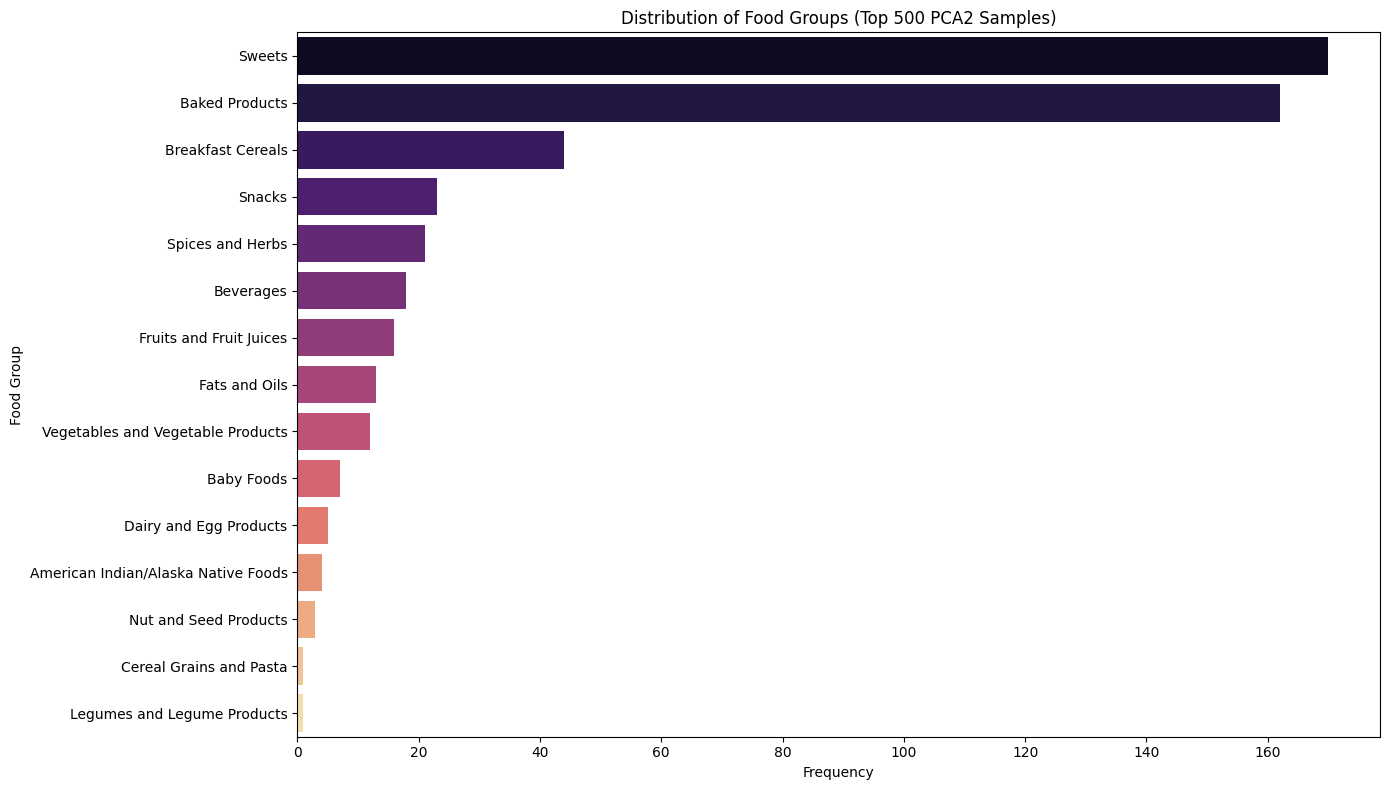

In [38]:
pca2_samples = newdf.nlargest(500, 'component2')
plt.figure(figsize=(14, 8))
sns.countplot(y='FoodGroup', data=pca2_samples, order=pca2_samples['FoodGroup'].value_counts().index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Food Group')
plt.title('Distribution of Food Groups (Top 500 PCA2 Samples)')
plt.tight_layout()
plt.show()


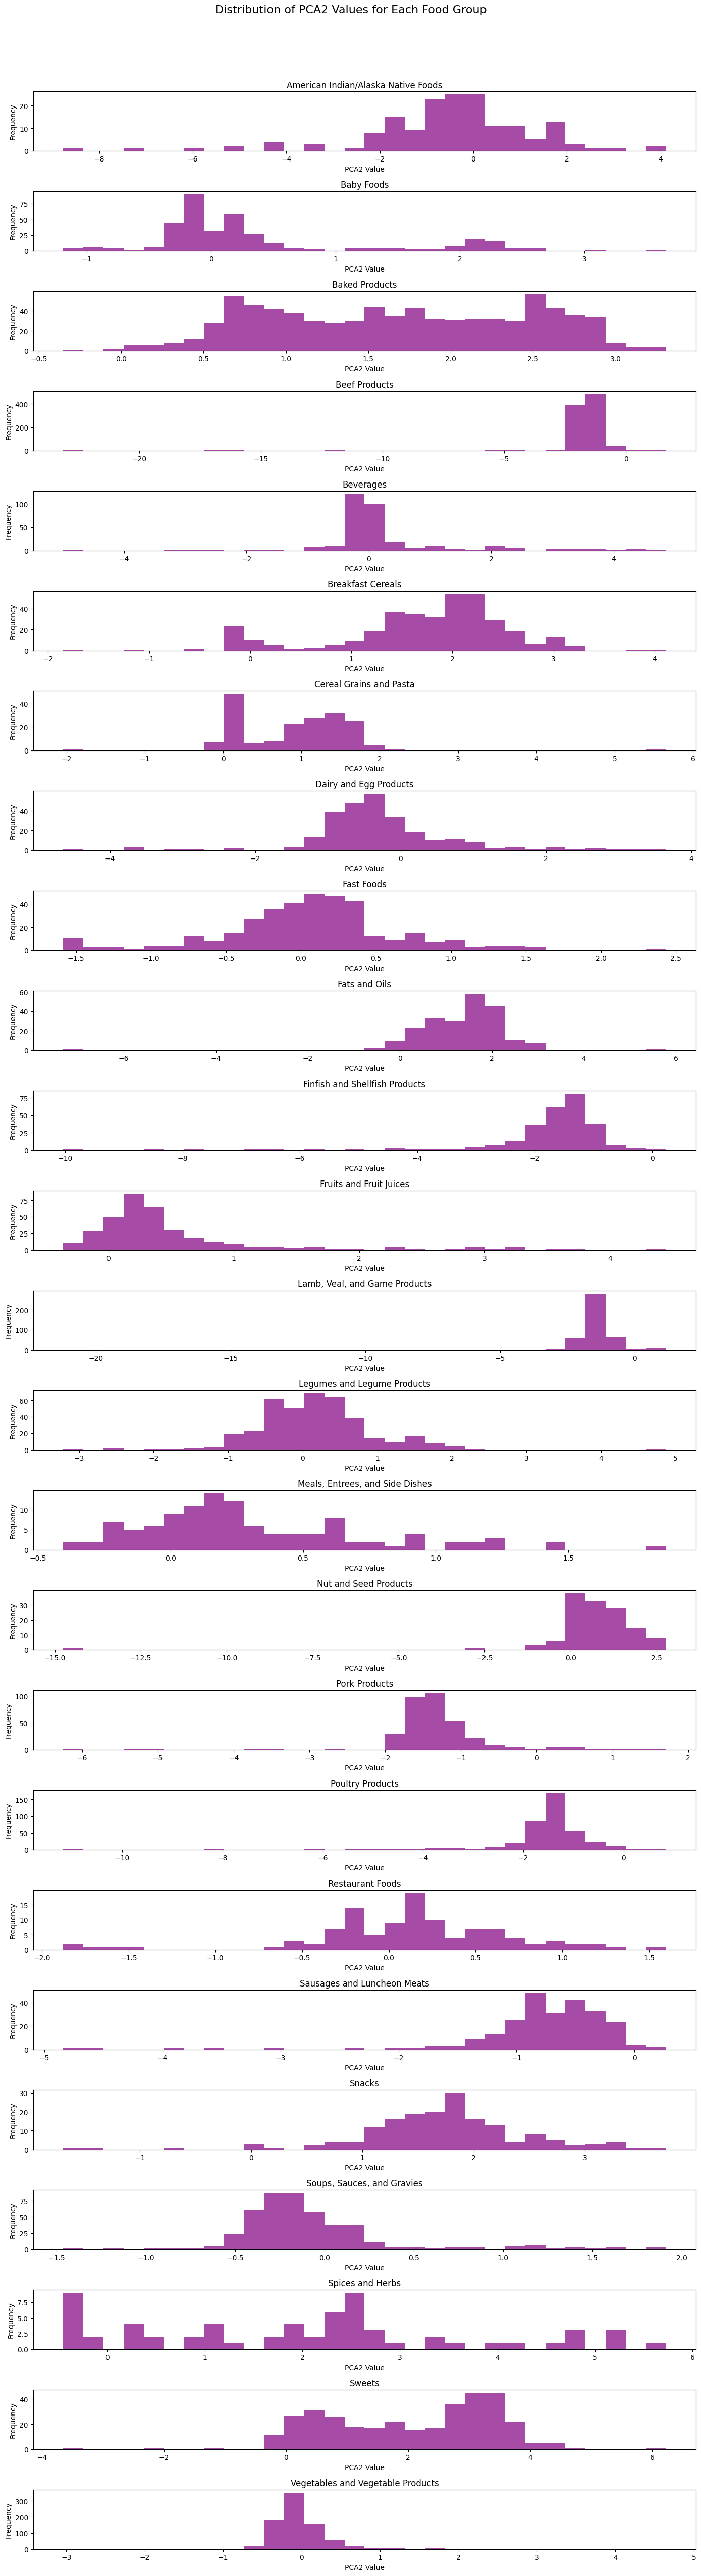

In [40]:
food_groups = np.unique(newdf['FoodGroup'])

fig = plt.figure(figsize=(14, 2 * len(food_groups)))

for i, group in enumerate(food_groups):
    ax = plt.subplot(len(food_groups), 1, i + 1)
    plt.hist(newdf[newdf['FoodGroup'] == group]['component2'], bins=30, alpha=0.7, color='purple')
    ax.set_title(group)
    ax.set_xlabel('PCA2 Value')
    ax.set_ylabel('Frequency')

plt.suptitle('Distribution of PCA2 Values for Each Food Group', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


In [42]:
final_df = newdf[newdf['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])][['component1', 'component2', 'FoodGroup']]
final_df

,component1,component2,FoodGroup
1816,21.727444,0.907318,Breakfast Cereals
1817,8.114446,1.753498,Breakfast Cereals
1818,6.419328,2.398737,Breakfast Cereals
1819,15.069060,2.625068,Breakfast Cereals
1820,10.882908,3.025783,Breakfast Cereals
...,...,...,...
8573,1.178574,1.218025,Breakfast Cereals
8574,3.951568,1.931161,Breakfast Cereals
8580,-0.580807,0.275364,Beverages
8592,8.563541,1.647830,Breakfast Cereals


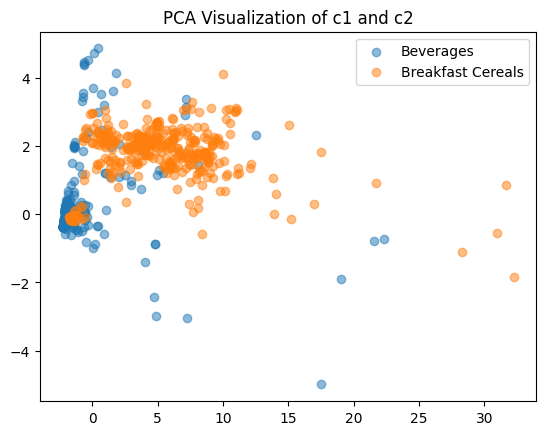

In [47]:
beverages_df = final_df[final_df['FoodGroup'] == 'Beverages']
breakfast_df = final_df[final_df['FoodGroup'] == 'Breakfast Cereals']
plt.scatter(beverages_df['component1'], beverages_df['component2'], alpha=0.5, label='Beverages')
plt.scatter(breakfast_df['component1'], breakfast_df['component2'], alpha=0.5, label='Breakfast Cereals')
plt.legend()
plt.title('PCA Visualization of c1 and c2')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">We can determine the distribution of each food group relative to a principal component. This helps us understand the relationship between a PCA component and specific food groups, aiding in their classification and highlighting differences after PCA is performed (PCA is typically followed by data classification to better understand the distinctions).</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">As observed in the distributions, beverages have a positive distribution in PCA1, while breakfast cereals exhibit a negative distribution, which is evident in the last plot. Upon closer inspection, you can see that beverages have positive values for both PCA1 and PCA2, whereas breakfast cereals show negative values for both PCA1 and PCA2.</span>

